In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import Normalize
from ydata_profiling import ProfileReport

# H&M clothes

In [2]:
df_HM_clothes = pd.read_csv("data_h&m_tendnace_clothes.csv")

In [3]:
df_HM_clothes.head()

,Unnamed: 0,product_id,gender,clothes,color,price
0,0,1166969003,FEMME,Robe,Cream/Floral,"\r\n 39,99 €"
1,1,1142215002,FEMME,Blouse,Noir,"\r\n 49,99 €"
2,2,1159122003,FEMME,Robe,Vert,"\r\n 59,99 €"
3,3,1159122001,FEMME,Robe,Noir,"\r\n 59,99 €"
4,4,1157667001,FEMME,Robe,Noir,"\r\n 79,99 €"


In [4]:
df_HM_clothes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1095 non-null   int64 
 1   product_id  1095 non-null   int64 
 2   gender      1095 non-null   object
 3   clothes     1095 non-null   object
 4   color       1095 non-null   object
 5   price       1095 non-null   object
dtypes: int64(2), object(4)
memory usage: 51.5+ KB


## Clean Data_frame_clothes

In [5]:
#Supprimer la colonne "unnamed: 0 car elle ne sert à rien"
df_HM_clothes.drop(columns = "Unnamed: 0", inplace = True)

#nettoyer la colonne price et modifier le  type en float
df_HM_clothes['price'] = df_HM_clothes['price'].astype(str)
df_HM_clothes['price'] = df_HM_clothes['price'].str.replace(',', '.')
df_HM_clothes['price'] = df_HM_clothes['price'].str.replace('\r\n','')
df_HM_clothes['price'] = df_HM_clothes['price'].str.replace('€','')
df_HM_clothes['price'] = df_HM_clothes['price'].astype(float)
df_HM_clothes.rename({'price':'price (€)'})
# modifier le type de product_id en string
df_HM_clothes['product_id'] = df_HM_clothes['product_id'].astype(str)

#Mettre les champs en minuscules
df_HM_clothes = df_HM_clothes.applymap(lambda x: x.lower() if isinstance(x, str) else x)

# Mettre les noms de colonnes en minuscules
df_HM_clothes.rename(columns=lambda x: x.lower(), inplace=True)


df_HM_clothes.head()

,product_id,gender,clothes,color,price
0,1166969003,femme,robe,cream/floral,39.99
1,1142215002,femme,blouse,noir,49.99
2,1159122003,femme,robe,vert,59.99
3,1159122001,femme,robe,noir,59.99
4,1157667001,femme,robe,noir,79.99


In [6]:
df_HM_clothes["clothes"].unique()

array(['robe', 'blouse', 'lace', 'sandales', 'longue', 'crop', '90s',
       'short', 'top', 'maillot', 'haut', 'bas', 'jupe', 'lot', 'chemise',
       'blazer', 'textured-weave', 'débardeur', 'bob', 'combi-pantalon',
       'pantalon', 'minijupe', 'claquettes', 'tongs', 't-shirt',
       'bermuda', 'cuissard', 'ensemble', 'h&m+', 'espadrilles', 'caraco',
       'soutien-gorge', 'legging', 'jupe-culotte', 'slim', 'body',
       'salopette', 'sneakers', 'body-string', 'v-neck', 'foulard',
       'broderie', 'chaussures', 'draped', 'long-sleeved', 'brassière',
       'grand', 'padded', 'flared', 'escarpins', 'chapeau', 'linen-blend',
       'tennis', 'polo', 'skinny', 'loose-knit', 'mini',
       'foulard/bandeau', 'pointelle-knit', 'casquette', 'wedge-heeled',
       'pull', 'combi-short', 'combinaison', 'low', 'panty', 'tapered',
       'chino', 'bomber', 'hoodie', 'pyjama', 'boxer', 'sweat', 'veste'],
      dtype=object)

In [7]:
# Créez un dictionnaire pour mapper les éléments de la colonne 'clothes' à leurs catégories correspondantes
category_mapping = {
    'robe': 'Hauts', 'blouse': 'Hauts', 'lace': 'Hauts', 'crop': 'Hauts', 'top': 'Hauts', 'maillot': 'Sous-vêtements',
    'haut': 'Hauts', 'chemise': 'Hauts', 'blazer': 'Hauts', 'débardeur': 'Hauts', 't-shirt': 'Hauts',
    'caraco': 'Sous-vêtements','polo': 'Hauts', 'pull': 'Hauts', 'hoodie': 'Hauts', 'sweat': 'Hauts', 'veste': 'Hauts',
    '90s':'Bas','lot':'Sous-vêtements', 'textured-weave':'Hauts','bob':'Accessoires','combi-pantalon':'Combinaisons',
     'claquettes':'Chaussures','tongs':'Chaussures','ensemble':'Sous-vêtements','h&m+':'Hauts','espadrilles':'Chaussures',
    'sneakers':'Chaussures','v-neck':'Hauts','foulard':'Accessoires','broderie':'Hauts','chaussures':'Chaussures',
    'draped':'Hauts','long-sleeved':'Hauts', 'escarpins':'Chaussures','chapeau':'Accessoires','linen-blend':'Hauts',
    'longue': 'Bas', 'short': 'Bas', 'bas': 'Bas', 'jupe': 'Bas', 'minijupe': 'Bas', 'pantalon': 'Bas','flared':'Bas',
    'bermuda': 'Bas', 'cuissard': 'Bas', 'legging': 'Bas', 'jupe-culotte': 'Bas', 'slim': 'Bas', 'salopette': 'Bas',
    'chino': 'Bas', 'tapered': 'Bas', 'skinny': 'Bas', 'bomber': 'Hauts','grand':'Accessoires','padded':'Sous-vêtements',
    'tennis':'Chaussures','loose-knit':'Hauts','mini':'Hauts','foulard/bandeau':'Accessoires','pointelle-knit':'Bas',
    'casquette':'Accessoires','wedge-heeled':'Chaussures','combi-short':'Bas','combinaison':'Combinaisons','low':'Bas',
    'panty':'Sous-vêtements','pyjama':'Sous-vêtements','boxer':'Sous-vêtements',
    'soutien-gorge': 'Sous-vêtements', 'body': 'Hauts', 'body-string': 'Hauts','brassière':'Hauts','sandales':'Chaussures' }

df_HM_clothes['clothes'] = df_HM_clothes['clothes'].replace(category_mapping)
df_HM_clothes.rename(columns = {"clothes":"categories_clothes"} , inplace=True)
df_HM_clothes.categories_clothes.unique()

array(['Hauts', 'Chaussures', 'Bas', 'Sous-vêtements', 'Accessoires',
       'Combinaisons'], dtype=object)

In [8]:
df_HM_clothes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_id          1095 non-null   object 
 1   gender              1095 non-null   object 
 2   categories_clothes  1095 non-null   object 
 3   color               1095 non-null   object 
 4   price               1095 non-null   float64
dtypes: float64(1), object(4)
memory usage: 42.9+ KB


## DATA Visualisation 

Text(0.5, 0, 'prix')

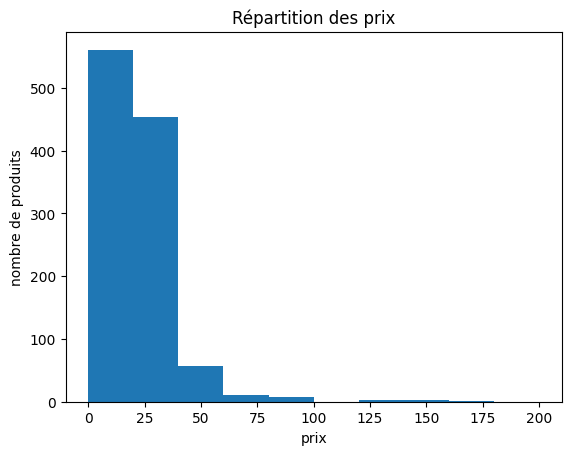

In [9]:
plt.hist(df_HM_clothes["price"], bins = 10, range = (0,200))
plt.title("Répartition des prix")
plt.ylabel("nombre de produits")
plt.xlabel("prix")

# H&M compositions

In [10]:
df_HM_composition = pd.read_csv("data_h&m_tendance_compo.csv")

In [11]:
df_HM_composition.head()

,Unnamed: 0,product_id,layer,material,percentage
0,0,1166969003,Doublure,Polyester,100.0
1,1,1166969003,Couche extérieure,Polyester,100.0
2,2,1166969003,Bordure,Polyester,100.0
3,3,1142215002,Doublure,Polyester,100.0
4,4,1142215002,Couche extérieure,Polyester,61.0


In [12]:
df_HM_composition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2159 entries, 0 to 2158
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2159 non-null   int64  
 1   product_id  2159 non-null   int64  
 2   layer       1295 non-null   object 
 3   material    2159 non-null   object 
 4   percentage  2159 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 84.5+ KB


## Clean Data_frame_compositions

In [13]:
#Supprimer la colonne "unnamed: 0 car elle ne sert à rien"
df_HM_composition.drop(columns = "Unnamed: 0", inplace = True)

# modifier le type de product_id en string
df_HM_composition['product_id'] = df_HM_composition['product_id'].astype(str)

#Mettre les champs en minuscules
df_HM_composition = df_HM_composition.applymap(lambda x: x.lower() if isinstance(x, str) else x)

# Mettre les noms de colonnes en minuscules
df_HM_composition.rename(columns=lambda x: x.lower(), inplace=True)

#changer le matériaux cuir velours en cuir
df_HM_composition['material'] = df_HM_composition['material'].replace('cuir velours', 'cuir')

#remplacer les nan par matière principale
df_HM_composition["layer"] = df_HM_composition["layer"].fillna('matière principale')


df_HM_composition.head()

,product_id,layer,material,percentage
0,1166969003,doublure,polyester,100.0
1,1166969003,couche extérieure,polyester,100.0
2,1166969003,bordure,polyester,100.0
3,1142215002,doublure,polyester,100.0
4,1142215002,couche extérieure,polyester,61.0


In [14]:
df_HM_composition["layer"].unique()

array(['doublure', 'couche extérieure', 'bordure', 'semelle intérieure',
       'semelle extérieure', 'doublure de poche', 'matière principale',
       'détails', 'broderie', 'dessus', 'couche intérieure', 'taille',
       'dentelle', 'doublure de bonnet', 'filet',
       'doublure intérieure entrejambe', 'maille', 'côté', 'semelle',
       'côté, doublure', 'poche', 'doublures', 'enduit', 'matelassé',
       'ceinture', 'bas', 'devant', 'doublure de manche', 'base', 'haut',
       'doublure et semelle intérieure', 'dos', 'galon'], dtype=object)

**_Remarques_:** On a trop de catégorie layer on va les regroupement en fonction de leur rôle dans le vêtements, çela nous obligera à recalculé le pourcentage 

In [15]:
# Créer un dictionnaire pour les modifications
replacement_dict = {
    'couche extérieure': 'matière principale',
    'couche intérieure': 'matière principale',
    'maille': 'matière principale',
    'enduit': 'matière principale',
    'matelassé': 'matière principale',
    'dessus': 'matière principale',
    'doublure': 'doublure',
    'doublure de poche': 'doublure',
    'doublure de bonnet': 'doublure',
    'doublure intérieure entrejambe': 'doublure',
    'doublures': 'doublure',
    'doublure de manche': 'doublure',
    'côté, doublure': 'doublure',
    'semelle extérieure': 'semelle',
    'semelle intérieure': 'semelle',
    'doublure et semelle intérieure': 'semelle',
    'semelle': 'semelle',
    'bordure': 'décoration',
    'broderie': 'décoration',
    'dentelle': 'décoration',
    'filet': 'décoration',
    'détails': 'décoration',
    'galon': 'décoration',
    'taille': 'accessoires',
    'ceinture': 'accessoires',
    'bas': 'accessoires',
    'haut': 'accessoires',
    'devant': 'accessoires',
    'dos': 'accessoires',
    'côté': 'accessoires',
    'poche': 'accessoires',
    'base': 'accessoires',
}

# Appliquer le dictionnaire de remplacement à la colonne "layer"
df_HM_composition['layer'] = df_HM_composition['layer'].replace(replacement_dict)

In [16]:
df_HM_composition["layer"].unique()

array(['doublure', 'matière principale', 'décoration', 'semelle',
       'accessoires'], dtype=object)

In [17]:
#recalcule de pourcentage car avec les nouveaux layers on doit le changer

new_df = df_HM_composition.groupby(["product_id", "layer"]).sum().reset_index()
new_df = new_df.loc[:, ["product_id", "layer", "percentage"]]
merged_df = pd.merge(df_HM_composition, new_df, on=["product_id", "layer"], suffixes=("", "_sum"))
merged_df["new_percentage"] = (merged_df["percentage"] / merged_df["percentage_sum"]) * 100
merged_df.drop(columns=["percentage_sum","percentage"], inplace = True)


df_HM_composition = merged_df

In [18]:
df_HM_composition.head()

,product_id,layer,material,new_percentage
0,1166969003,doublure,polyester,100.0
1,1166969003,matière principale,polyester,100.0
2,1166969003,décoration,polyester,100.0
3,1142215002,doublure,polyester,100.0
4,1142215002,matière principale,polyester,61.0


In [19]:
df_HM_composition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2159 entries, 0 to 2158
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      2159 non-null   object 
 1   layer           2159 non-null   object 
 2   material        2159 non-null   object 
 3   new_percentage  2159 non-null   float64
dtypes: float64(1), object(3)
memory usage: 67.6+ KB


## DATA Visualisation

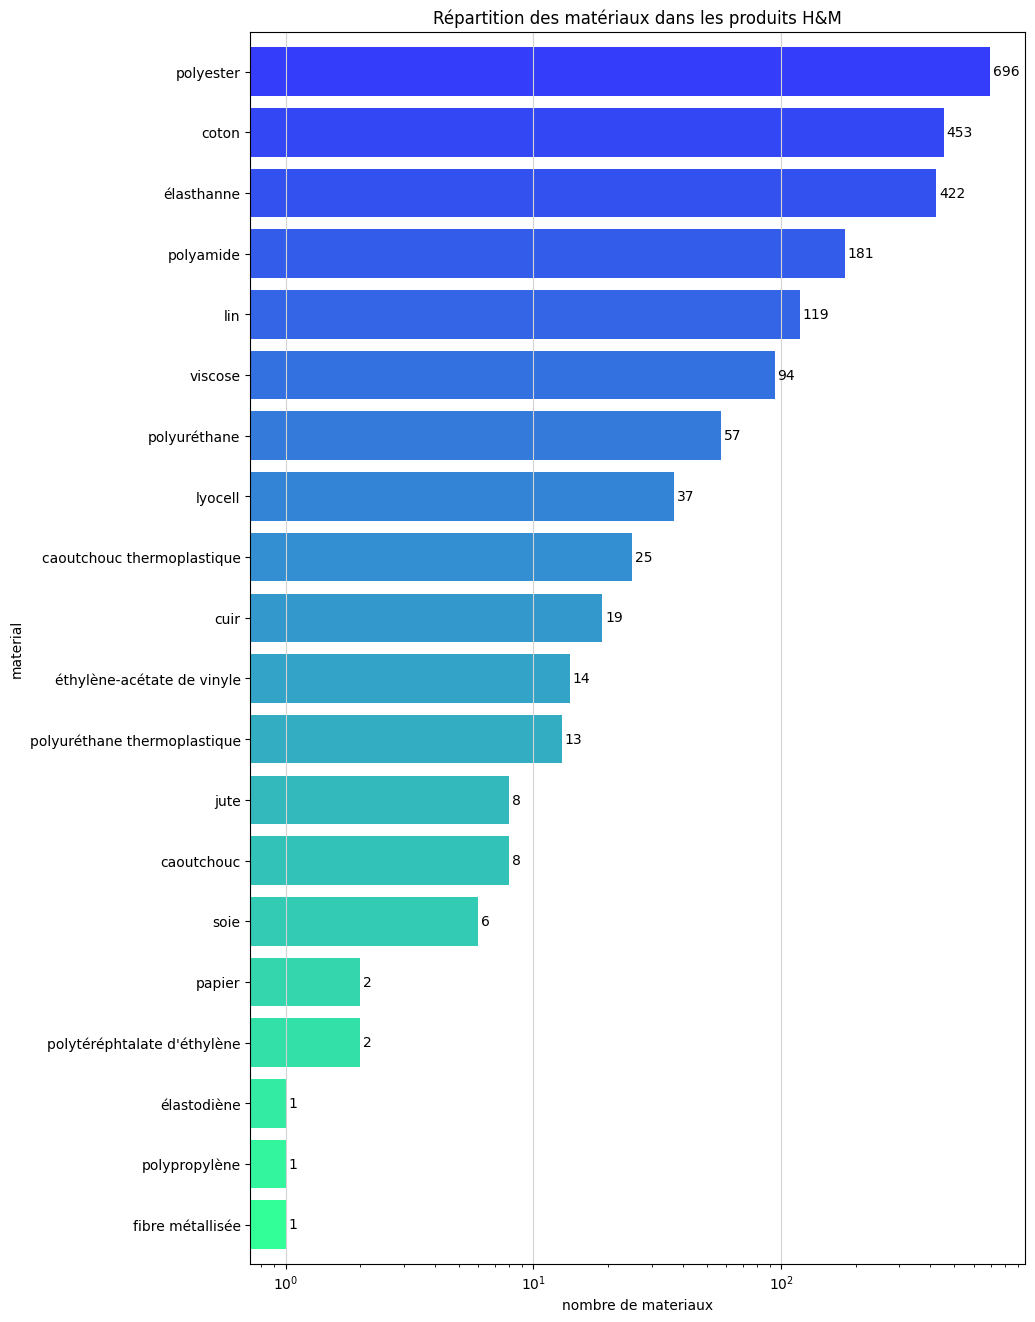

In [20]:
nbre_col_unique = len(df_HM_composition["material"].unique())
cmap = plt.get_cmap('winter_r')
norm = Normalize(vmin=0, vmax=nbre_col_unique)
opts = dict( 
    kind='barh',   #indique que nous allons tracer un graphique en barres horizontales
    width=0.8,     #définit la largeur des barres
    figsize = (10,16), #définit la taille de la figure à 5 pouces de large et 8 pouces de hauteur
    xlabel = 'Liste des matériaux',  #définit l'étiquette de l'axe x
    color = cmap(norm(sorted((list(range(nbre_col_unique)))))), # définit la couleur des barres en utilisant une colormap (cmap) normalisée (norm) basée
    legend = False, #désactive l'affichage de la légende
    alpha = 0.8  #définit la transparence des barres 
)

ax = ( 
    df_HM_composition.groupby("material")
    .size()
    .sort_values(ascending=True)
    .plot(y='nombre de materiaux', **opts)
)

ax.set_xscale("log")
ax.set_xlabel("nombre de materiaux")

ax.bar_label(ax.containers[0],padding=2)
ax.set_title('Répartition des matériaux dans les produits H&M')
ax.grid(axis='x', color='lightgrey', zorder=10)


# H&M suppliers

In [21]:
df_HM_supplier = pd.read_csv("df_suplier.csv")
df_HM_supplier.head()

,Unnamed: 0,Product ID,Country,Company,Factory,Number of Employees
0,0,1166969003,Chine,"SUZHOU LAOHONG KNITTING GARMENT CO.,LTD.","Shandong Wanli Fashion Co.,Ltd Jiu Nv Subsidiary",501-1000
1,1,1142215002,Chine,Yunhan International (HK) Limited,"Suzhou Xijin Fashion Co.,Ltd",101-500
2,2,1159122003,Chine,SERENDIPITY INTERNATIONAL TRADING LTD.,"Serendipity Fashion Co.,ltd",101-500
3,3,1159122001,Chine,SERENDIPITY INTERNATIONAL TRADING LTD.,"Serendipity Fashion Co.,ltd",101-500
4,4,1157667001,Chine,SERENDIPITY INTERNATIONAL TRADING LTD.,"Suhao Eastren Garments Co., Ltd.",101-500


## Clean Data_frame_suppliers

In [22]:
#Supprimer la colonne "unnamed: 0 car elle ne sert à rien"
df_HM_supplier.drop(columns = "Unnamed: 0", inplace = True)

# modifier le type de product_id en string
df_HM_supplier['Product ID'] = df_HM_supplier['Product ID'].astype(str)

#renonmer les colonnes pour enlever les espaces
df_HM_supplier.rename(columns = {'Product ID':'Product_ID', "Number of Employees": "nb_employees"} , inplace = True)

#Mettre les champs en minuscules
df_HM_supplier = df_HM_supplier.applymap(lambda x: x.lower() if isinstance(x, str) else x)

# Mettre les noms de colonnes en minuscules
df_HM_supplier.rename(columns=lambda x: x.lower(), inplace=True)


df_HM_supplier.head()

,product_id,country,company,factory,nb_employees
0,1166969003,chine,"suzhou laohong knitting garment co.,ltd.","shandong wanli fashion co.,ltd jiu nv subsidiary",501-1000
1,1142215002,chine,yunhan international (hk) limited,"suzhou xijin fashion co.,ltd",101-500
2,1159122003,chine,serendipity international trading ltd.,"serendipity fashion co.,ltd",101-500
3,1159122001,chine,serendipity international trading ltd.,"serendipity fashion co.,ltd",101-500
4,1157667001,chine,serendipity international trading ltd.,"suhao eastren garments co., ltd.",101-500


In [23]:
df_HM_supplier.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1291 entries, 0 to 1290
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_id    1291 non-null   object
 1   country       1291 non-null   object
 2   company       1291 non-null   object
 3   factory       1291 non-null   object
 4   nb_employees  1263 non-null   object
dtypes: object(5)
memory usage: 50.6+ KB


## DATA Visualisation

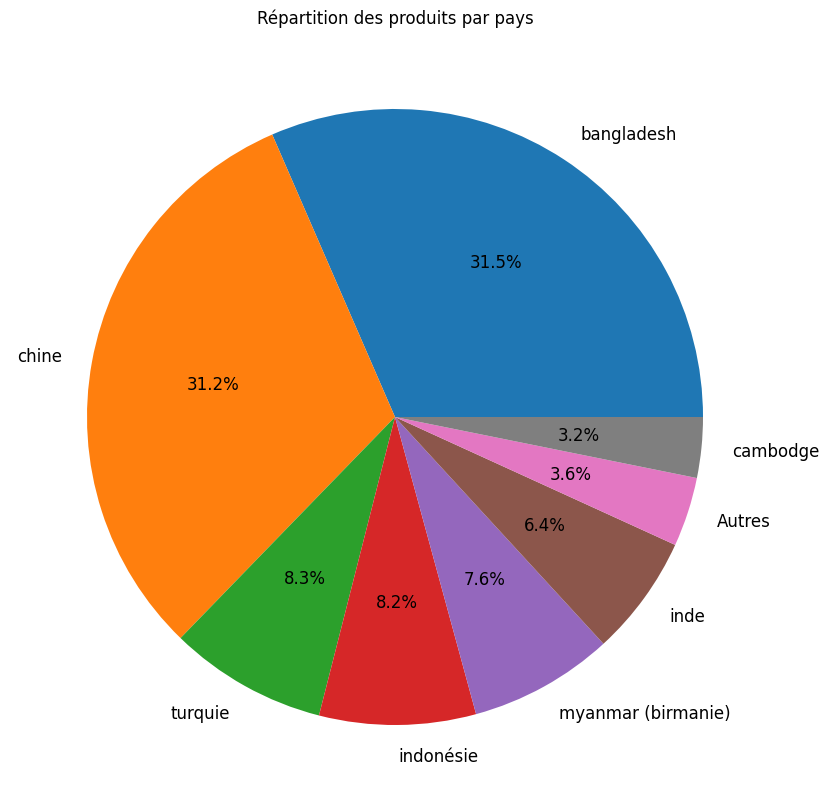

In [24]:
# Regrouper les produits par pays et compter le nombre de produits pour chaque pays
produits_par_pays = (
    df_HM_supplier
    .groupby('country')
    .agg(nombre_produits=("product_id", "count"))
    .reset_index()
)

# Calculer le pourcentage pour chaque tranche
produits_par_pays['pourcentage'] = produits_par_pays['nombre_produits'] / produits_par_pays['nombre_produits'].sum() * 100

# Regrouper les pays avec un pourcentage inférieur à 2% dans une seule catégorie "Autres"
seuil = 2
produits_par_pays.loc[produits_par_pays['pourcentage'] < seuil, 'country'] = 'Autres'
produits_par_pays = (
    produits_par_pays
    .groupby('country')
    .agg(nombre_produits=("nombre_produits", "sum"), pourcentage=("pourcentage", "sum"))
    .sort_values(by = "nombre_produits",ascending = False)
    .reset_index()
)


# Tracer le diagramme circulaire à l'aide de matplotlib
plt.figure(figsize=(10,10))
plt.pie(
    produits_par_pays['nombre_produits'], 
    labels=produits_par_pays['country'], 
    autopct=lambda pct: f"{pct:.1f}%" if pct >= seuil else "",
    textprops={'fontsize': 12}
)
plt.title('Répartition des produits par pays')
plt.show()



# DATA H&M 

In [25]:
df_HM = pd.merge(df_HM_clothes,df_HM_composition,on="product_id",how="inner")

In [26]:
df_HM = pd.merge(df_HM,df_HM_supplier,on = "product_id")

In [27]:
df_HM.head()

,product_id,gender,categories_clothes,color,price,layer,material,new_percentage,country,company,factory,nb_employees
0,1166969003,femme,Hauts,cream/floral,39.99,doublure,polyester,100.0,chine,"suzhou laohong knitting garment co.,ltd.","shandong wanli fashion co.,ltd jiu nv subsidiary",501-1000
1,1166969003,femme,Hauts,cream/floral,39.99,matière principale,polyester,100.0,chine,"suzhou laohong knitting garment co.,ltd.","shandong wanli fashion co.,ltd jiu nv subsidiary",501-1000
2,1166969003,femme,Hauts,cream/floral,39.99,décoration,polyester,100.0,chine,"suzhou laohong knitting garment co.,ltd.","shandong wanli fashion co.,ltd jiu nv subsidiary",501-1000
3,1142215002,femme,Hauts,noir,49.99,doublure,polyester,100.0,chine,yunhan international (hk) limited,"suzhou xijin fashion co.,ltd",101-500
4,1142215002,femme,Hauts,noir,49.99,matière principale,polyester,61.0,chine,yunhan international (hk) limited,"suzhou xijin fashion co.,ltd",101-500


In [28]:
df_HM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2503 entries, 0 to 2502
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_id          2503 non-null   object 
 1   gender              2503 non-null   object 
 2   categories_clothes  2503 non-null   object 
 3   color               2503 non-null   object 
 4   price               2503 non-null   float64
 5   layer               2503 non-null   object 
 6   material            2503 non-null   object 
 7   new_percentage      2503 non-null   float64
 8   country             2503 non-null   object 
 9   company             2503 non-null   object 
 10  factory             2503 non-null   object 
 11  nb_employees        2458 non-null   object 
dtypes: float64(2), object(10)
memory usage: 234.8+ KB


In [29]:
# suppression des lignes dupliquée
print(" nous avons", df_HM[df_HM.duplicated()].shape[0], "lignes dupliquées et nous allons les supprimer")
df_HM.drop_duplicates(inplace=True)

 nous avons 28 lignes dupliquées et nous allons les supprimer


In [30]:
print("nous avons scrapé: ",df_HM.product_id.unique().shape[0], "produits différents de H&M, et pour chaque produit "
      "nous avons récupérré les caractéristiques suivantes : ", df_HM.columns.tolist())

nous avons scrapé:  1025 produits différents de H&M, et pour chaque produit nous avons récupérré les caractéristiques suivantes :  ['product_id', 'gender', 'categories_clothes', 'color', 'price', 'layer', 'material', 'new_percentage', 'country', 'company', 'factory', 'nb_employees']


**_Remarque_**: Un produit peut être composé de différents matériaux c'est pour ça que notre dataframe contient 1989 lignes

In [31]:
df_HM.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2475 entries, 0 to 2502
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_id          2475 non-null   object 
 1   gender              2475 non-null   object 
 2   categories_clothes  2475 non-null   object 
 3   color               2475 non-null   object 
 4   price               2475 non-null   float64
 5   layer               2475 non-null   object 
 6   material            2475 non-null   object 
 7   new_percentage      2475 non-null   float64
 8   country             2475 non-null   object 
 9   company             2475 non-null   object 
 10  factory             2475 non-null   object 
 11  nb_employees        2430 non-null   object 
dtypes: float64(2), object(10)
memory usage: 251.4+ KB


# DATA HIGG

In [32]:
df_HIGG = pd.read_csv("higgs_score_materials.csv")

In [33]:
df_HIGG.head()

,name,globalWarmingPts,eutrophicationPts,waterScarcityPts,abioticDepletionPts,chemistryPts,impact,waterConsumption,biogenicCarbon
0,Monolithic Laminate,4.518294,0.958347,0.146292,7.888935,4.872923,18.384790,30.981163,0.0000
1,Goose Down Insulation,1.528904,3.918803,0.269525,0.754759,6.928230,13.400220,14.924221,0.8944
2,Duck Down insulation,1.528904,3.918803,0.269525,0.754759,6.928230,13.400220,14.924221,0.0000
3,Iron,2.345487,0.594290,0.036951,1.912598,4.863257,9.752583,7.202557,0.0000
4,Tin,20.558422,59.770568,5.945609,17.582154,5.854645,109.711399,300.507836,0.0000


In [34]:
df_HIGG.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 98 non-null     object 
 1   globalWarmingPts     98 non-null     float64
 2   eutrophicationPts    98 non-null     float64
 3   waterScarcityPts     98 non-null     float64
 4   abioticDepletionPts  98 non-null     float64
 5   chemistryPts         98 non-null     float64
 6   impact               98 non-null     float64
 7   waterConsumption     98 non-null     float64
 8   biogenicCarbon       98 non-null     float64
dtypes: float64(8), object(1)
memory usage: 7.0+ KB


In [35]:
#Mettre les champs en minuscules
df_HIGG = df_HIGG.applymap(lambda x: x.lower() if isinstance(x, str) else x)

**_Remarque_:** pour notre étude nous allons se concentré sur la colonne impact qui représente la somme total des
 globalWarmingPts, eutrophicationPts, waterScarcityPts, abioticDepletionPts et de chemistryPts  

In [36]:
df_HIGG.drop(columns=['globalWarmingPts','eutrophicationPts','biogenicCarbon'
                      ,'abioticDepletionPts','waterScarcityPts','chemistryPts'
                      ,'waterConsumption','biogenicCarbon'],inplace=True)

In [37]:
df_HIGG.head()

,name,impact
0,monolithic laminate,18.384790
1,goose down insulation,13.400220
2,duck down insulation,13.400220
3,iron,9.752583
4,tin,109.711399


## Worst materials

In [38]:
df_HIGG.sort_values(by = "impact", ascending = False)

,name,impact
26,gold,145485.510348
60,platinum,73076.915804
93,silk fabric,1076.406487
95,alpaca fabric,316.043446
25,silver,199.983270
...,...,...
5,wood,6.642587
76,brass,6.037289
63,cardboard,4.554913
39,cork,3.500833


# DATA H&M and HIGG

**_Remarque_:** 
nous voulons rajouter les informations (potentiel réchauffement, Pénurie d'eau) dans le dataframe de H&M, la colonne en commun est la colonne matière et name, mais nous avons un problème car les deux colonnes ne sont pas en même langue
donc nous allons suivre les étapes suivante:
1. Créer une table intermédiaire translation_table avec deux colonnes : "fr" et "en", contenant respectivement la traduction de chaque matière en français et en anglais.

2. Effectuer une jointure entre les deux tables table_fr et translation_table sur la colonne "matière" en français, puis une autre jointure entre le résultat de la première jointure et la table table_en sur la colonne "matière" en anglais.

## Construction DataFrame with all informations

In [39]:
# Dictionnaire des correspondances entre les matériaux en français et en anglais
data = {
    'fr': ['caoutchouc', 'caoutchouc thermoplastique', 'coton', 'cuir', 'fibre métallisée', 'jute', 'lin', 'lyocell', 'papier', 'polyamide', 'polyester', 'polypropylène', "polytéréphtalate d'éthylène", 'polyuréthane', 'polyuréthane thermoplastique', 'soie', 'viscose', 'élasthanne', 'élastodiène', 'éthylène-acétate de vinyle'],
    'en': ['natural rubber (nr)', 'thermoplastic elastomer (tpe)', 'cotton fabric', 'cow leather', None, 'jute fiber fabric', 'flax fiber fabric', 'lyocell fabric', 'paper', 'nylon fabric', 'polyester fabric', 'polypropylene (pp) fabric', None, 'polyurethane (pu) fabric', 'thermoplastic polyurethane (tpu) plastic', 'silk fabric', 'viscose/rayon fabric', 'elastane/spandex fabric', None, 'ethylene-vinyl acetate (eva) foam']
}

# Créer un DataFrame avec les colonnes 'fr' et 'en'
translation_table = pd.DataFrame(data)

display(translation_table)


,fr,en
0,caoutchouc,natural rubber (nr)
1,caoutchouc thermoplastique,thermoplastic elastomer (tpe)
2,coton,cotton fabric
3,cuir,cow leather
4,fibre métallisée,None
5,jute,jute fiber fabric
6,lin,flax fiber fabric
7,lyocell,lyocell fabric
8,papier,paper
9,polyamide,nylon fabric


In [40]:
df_HM_en = pd.merge(df_HM,translation_table, left_on = "material", right_on = "fr")

In [41]:
df_HM_en.head()

,product_id,gender,categories_clothes,color,price,layer,material,new_percentage,country,company,factory,nb_employees,fr,en
0,1166969003,femme,Hauts,cream/floral,39.99,doublure,polyester,100.0,chine,"suzhou laohong knitting garment co.,ltd.","shandong wanli fashion co.,ltd jiu nv subsidiary",501-1000,polyester,polyester fabric
1,1166969003,femme,Hauts,cream/floral,39.99,matière principale,polyester,100.0,chine,"suzhou laohong knitting garment co.,ltd.","shandong wanli fashion co.,ltd jiu nv subsidiary",501-1000,polyester,polyester fabric
2,1166969003,femme,Hauts,cream/floral,39.99,décoration,polyester,100.0,chine,"suzhou laohong knitting garment co.,ltd.","shandong wanli fashion co.,ltd jiu nv subsidiary",501-1000,polyester,polyester fabric
3,1142215002,femme,Hauts,noir,49.99,doublure,polyester,100.0,chine,yunhan international (hk) limited,"suzhou xijin fashion co.,ltd",101-500,polyester,polyester fabric
4,1142215002,femme,Hauts,noir,49.99,matière principale,polyester,61.0,chine,yunhan international (hk) limited,"suzhou xijin fashion co.,ltd",101-500,polyester,polyester fabric


In [42]:
df_HM_HIGG = pd.merge(df_HM_en,df_HIGG, left_on = "en",right_on="name")

In [43]:
df_HM_HIGG.drop(columns = ["fr","en","name"], inplace = True )

In [44]:
display(df_HM_HIGG)

,product_id,gender,categories_clothes,color,price,layer,material,new_percentage,country,company,factory,nb_employees,impact
0,1166969003,femme,Hauts,cream/floral,39.99,doublure,polyester,100.0,chine,"suzhou laohong knitting garment co.,ltd.","shandong wanli fashion co.,ltd jiu nv subsidiary",501-1000,36.194696
1,1166969003,femme,Hauts,cream/floral,39.99,matière principale,polyester,100.0,chine,"suzhou laohong knitting garment co.,ltd.","shandong wanli fashion co.,ltd jiu nv subsidiary",501-1000,36.194696
2,1166969003,femme,Hauts,cream/floral,39.99,décoration,polyester,100.0,chine,"suzhou laohong knitting garment co.,ltd.","shandong wanli fashion co.,ltd jiu nv subsidiary",501-1000,36.194696
3,1142215002,femme,Hauts,noir,49.99,doublure,polyester,100.0,chine,yunhan international (hk) limited,"suzhou xijin fashion co.,ltd",101-500,36.194696
4,1142215002,femme,Hauts,noir,49.99,matière principale,polyester,61.0,chine,yunhan international (hk) limited,"suzhou xijin fashion co.,ltd",101-500,36.194696
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1991,1156355001,femme,Hauts,black,149.00,matière principale,soie,37.0,cambodge,tien-hu trading (hong kong) ltd.,m&v (cambodia ) ltd--branch 4,2501-3000,1076.406487
1992,1139918002,femme,Hauts,blanc,149.00,matière principale,soie,78.0,chine,zhejiang hempelzhi textile technology co. ltd,zhejiang hempelzhi textile technology co. ltd.,501-1000,1076.406487
1993,818600005,femme,Accessoires,beige/green,12.99,matière principale,papier,100.0,chine,zhejiang kaijia crafts co ltd,"zhejiang kaijia crafts co.,ltd",101-500,2.340080
1994,1155396003,femme,Hauts,rose,5.99,matière principale,papier,100.0,bangladesh,aswad composite mills ltd.,aswad composite mills ltd. ( u-2),2001-2500,2.340080


# Analyse

**_Remarque_:** Avant de commencer nous allons ajouter une colonne "material_impact" dans le DataFrame df_HM_HIGG qui représente l'impact pondéré de chaque matériau en fonction de son pourcentage dans le pdt

In [45]:
df_HM_HIGG['material_impact'] = df_HM_HIGG['impact'] * df_HM_HIGG['new_percentage'] / 100

In [46]:
df_HM_HIGG.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1996 entries, 0 to 1995
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_id          1996 non-null   object 
 1   gender              1996 non-null   object 
 2   categories_clothes  1996 non-null   object 
 3   color               1996 non-null   object 
 4   price               1996 non-null   float64
 5   layer               1996 non-null   object 
 6   material            1996 non-null   object 
 7   new_percentage      1996 non-null   float64
 8   country             1996 non-null   object 
 9   company             1996 non-null   object 
 10  factory             1996 non-null   object 
 11  nb_employees        1962 non-null   object 
 12  impact              1996 non-null   float64
 13  material_impact     1996 non-null   float64
dtypes: float64(4), object(10)
memory usage: 218.4+ KB


### Materials : (score)

Nous allons classé les material par leur impact

In [47]:
(
    df_HM_HIGG[["material","impact"]]
    .drop_duplicates()
    .sort_values(by = "impact", ascending = False)
)

,material,impact
1987,soie,1076.406487
1649,cuir,179.025254
1097,coton,101.122858
1747,lin,87.744374
787,viscose,55.354445
1908,jute,53.756194
1953,lyocell,50.708338
896,polyamide,48.854010
1669,polyuréthane,38.828825
0,polyester,36.194696


### Impact par produit :  (score)

nous allons calculé l'impact de chaque produit et afficher le classement des 20 produit qui ont l'impact le plus grand

In [48]:
total_impact = df_HM_HIGG.groupby('product_id')['material_impact'].sum().reset_index()

result = ( 
            pd.merge(total_impact, df_HM_HIGG[['product_id', 'categories_clothes', 'price']]
            .drop_duplicates(), on='product_id')
            .sort_values(by = "material_impact" , ascending=False)
                
)
result.head(20)

,product_id,material_impact,categories_clothes,price
725,1163470002,1131.760932,Hauts,139.00
740,1164189002,1127.114825,Bas,79.99
331,1139918002,932.157939,Hauts,149.00
941,685816194,564.996278,Hauts,5.99
755,1164787001,505.614290,Hauts,19.99
845,1173451003,505.614290,Bas,19.99
656,1159243001,498.124564,Chaussures,69.99
569,1156355001,497.923089,Hauts,149.00
34,1037593020,480.127231,Bas,14.99
29,1035679014,406.878417,Bas,39.99


In [49]:
ProfileReport(df_HM_HIGG.drop(columns = "product_id"))

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**_Remarque_:** on déduit qu' il n'y a pas de relation significative entre le prix et le matrial_impact.

### Catégories _ clothes (score)

Nous allons afficher la moyenne des prix et la moyenne de l'impact par catégorie 

In [50]:

result = (
    df_HM_HIGG
    .groupby(['categories_clothes'])[['price', 'material_impact']]
    .mean()
    .reset_index()
    .sort_values(by="material_impact",ascending=False)
)
result.head()

,categories_clothes,price,material_impact
0,Accessoires,13.468261,78.644657
1,Bas,25.531203,51.057971
5,Sous-vêtements,19.854706,48.522412
4,Hauts,27.886727,47.628118
2,Chaussures,30.560552,42.500401


**_Remarque_:** On peut déduire que la catégorie qui a la plus grande moyenne des impacts est la categorie: "Accéssoires".


### Material, categories_ clothes, Country

Nous allons afficher les matière de vêtements par catégories et par pays de fournisseurs

In [51]:
df_material_country = df_HM_HIGG.groupby(['material', 'categories_clothes'])['country'].agg(lambda x: list(set(x))).reset_index()

display(df_material_country)

,material,categories_clothes,country
0,caoutchouc,Bas,[chine]
1,caoutchouc,Chaussures,[chine]
2,caoutchouc,Hauts,"[bangladesh, pakistan, indonésie]"
3,caoutchouc thermoplastique,Bas,"[bangladesh, chine, cambodge]"
4,caoutchouc thermoplastique,Chaussures,"[bangladesh, myanmar (birmanie), chine]"
5,caoutchouc thermoplastique,Hauts,"[bangladesh, turquie, indonésie]"
6,caoutchouc thermoplastique,Sous-vêtements,[indonésie]
7,coton,Accessoires,"[chine, myanmar (birmanie)]"
8,coton,Bas,"[turquie, inde, chine, bangladesh, cambodge, p..."
9,coton,Chaussures,"[bangladesh, inde, chine, myanmar (birmanie)]"


In [52]:
pd.set_option('display.max_colwidth', None)

**_Remarque_:** Ce Dataframe nous permettra de voir si on peut changer le pays de fournisseur à fin de réduire les frais
    écologique de transport et les conséquences écologique, et choisir des pays plus EcoResponsable

### l'impact MSI pour chaque catégorie et chaque matière (score)

sachant qu'un produit est décrit par matière, pourcentage de la matière, catégorie.
Nous allons calculé dans chaque catégorie le pourcentage de matière qui exsite dans la même catégorie à fin de calculer l'impact total de la matière dans chaque catégorie

In [55]:
# On groupe les données par catégories de vêtements et par matière, et on calcule la somme des nouvelles pourcentages (new_percentage)
df_mat = df_HM_HIGG.groupby(['categories_clothes', 'material']).agg({'new_percentage': 'sum'})

# On normalise les données en calculant le pourcentage de chaque nouvelle pourcentage par rapport à la somme de toutes les nouvelles pourcentages du même groupe
df_mat = df_mat.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))

# On réinitialise l'index du DataFrame
df_mat = df_mat.reset_index()

# On renomme la colonne 'new_percentage' en 'percentage_categories'
df_mat = df_mat.rename(columns={'new_percentage': 'percentage_categories'})

# On fusionne le DataFrame avec les colonnes 'categories_clothes', 'material', et 'impact' pour récupérer l'impact associé à chaque combinaison de catégorie de vêtement et de matière
df_mat = df_mat.merge(df_HM_HIGG[['categories_clothes', 'material', 'impact']].drop_duplicates(), on=['categories_clothes', 'material'])

# On calcule l'impact de chaque catégorie en multipliant le pourcentage de la catégorie par son impact associé, et en divisant le résultat par 100
df_mat['impact_categorie'] = (df_mat['percentage_categories'] * df_mat['impact'])/100

# On trie le DataFrame en ordre décroissant selon les colonnes 'categories_clothes' et 'impact_categorie'
df_mat = df_mat.sort_values(by=['categories_clothes', 'impact_categorie'], ascending=[True, False])

# On réinitialise l'index du DataFrame
df_mat = df_mat.reset_index(drop=True)

# On affiche le DataFrame final
display(df_mat)



C:\Users\azert\AppData\Local\Temp\ipykernel_30404\3149728496.py:5: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  df_mat = df_mat.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))


ValueError: cannot insert categories_clothes, already exists